<a href="https://colab.research.google.com/github/Aman4922/Credit-Card-Fraud-Detection-/blob/main/Credit_Card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Pandas for data manipulation/data handling
import numpy as np

# Install imbalanced-learn if needed
!pip install -q imbalanced-learn

from sklearn.model_selection import train_test_split

# Import required libraries like SMOTE for handeing imbalance data
from imblearn.over_sampling import SMOTE
import collections

# Standardize the feature variables to have a mean of 0 and variance of 1
# Import required libraries for Scaling imbalance data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import required libraries for Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Store models and their accuracy scores
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [ ]:
df = pd.read_csv(r"/content/creditcard.csv" )  # Load the credit card transactions dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
fraud_distribution = df['Class'].value_counts()  # Get count of each class (0 = Legitimate, 1 = Fraud)
fraud_percentage = df['Class'].value_counts(normalize=True) * 100  # Get percentage of each class

# Create a DataFrame to display both numerical count and percentage
fraud_summary = pd.DataFrame({'Count': fraud_distribution, 'Percentage': fraud_percentage})

# Print the fraud summary table
print(fraud_summary)

        Count  Percentage
Class                    
0      284315   99.827251
1         492    0.172749


In [ ]:
X = df.drop(columns=['Class'])  # Features: All columns except 'Class'
y = df['Class']  # Target variable: 'Class' column (0 = Legitimate, 1 = Fraud)

# Note: We are NOT doing train/test split here! Instead, we will use TimeSeriesSplit later.

# Store original indices for y (needed for TimeSeriesSplit)
X_indices = X.index
y_indices = y.index

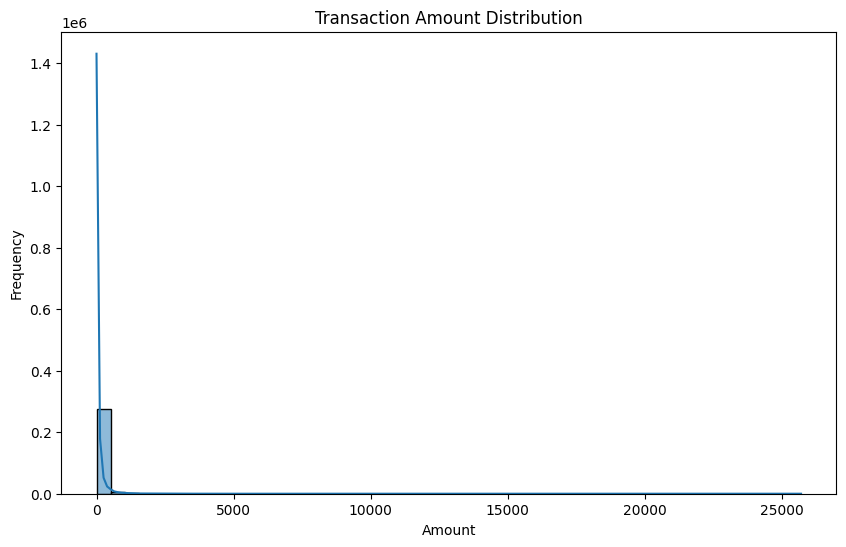

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)  # Histogram of the 'Amount' column
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

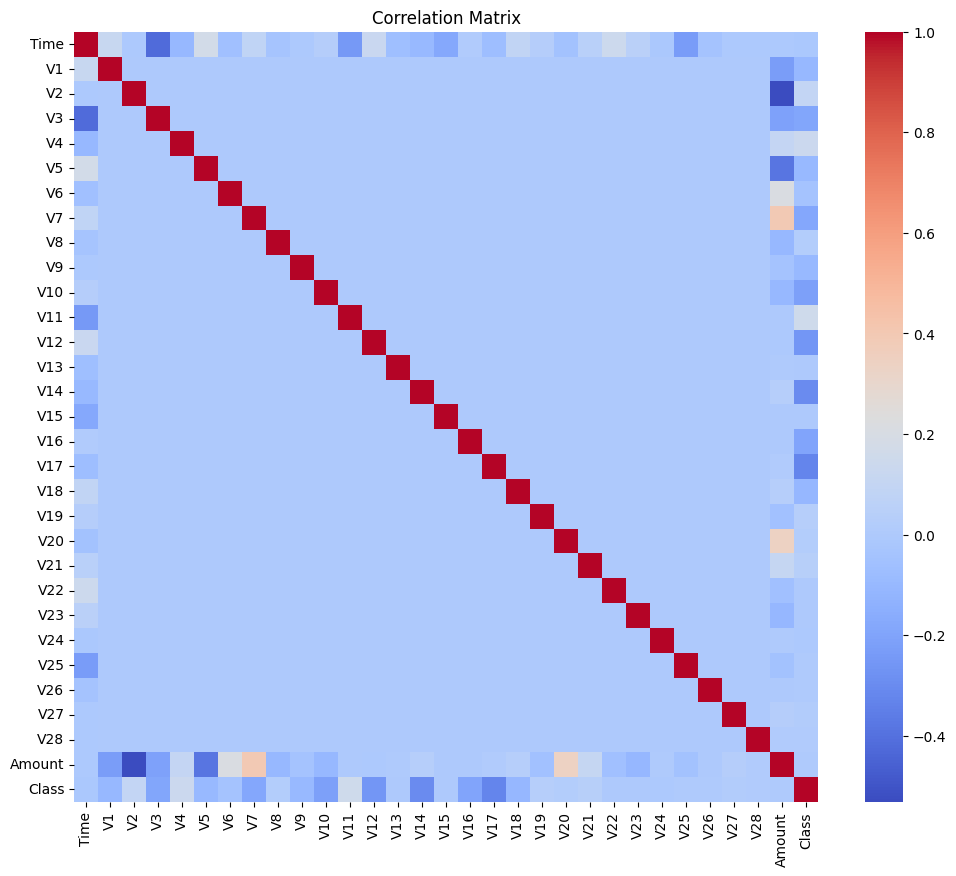

In [ ]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

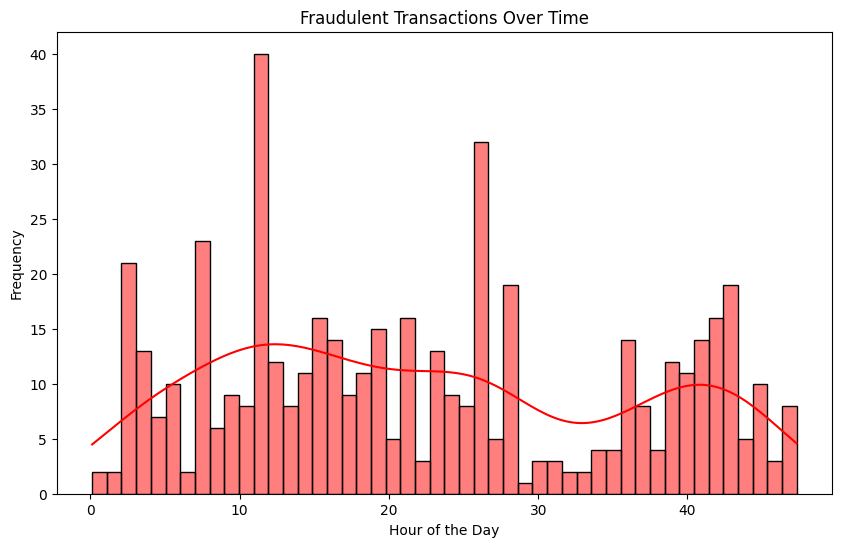

In [ ]:
df['Hour'] = df['Time'] / 3600  # Convert seconds to hours

# Plot fraud transactions over time
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 1]['Hour'], bins=48, kde=True, color='red')
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling features

# First, split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Now, split Train (80%) further into Train (80% of 80% = 64%) and Validation (20% of 80% = 16%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Convert target variables to NumPy arrays for consistency
y_test = y_test.values
y_train = y_train.values

print(f"Training Data: {X_train.shape}, Validation Data: {X_val.shape}, Testing Data: {X_test.shape}")

Training Data: (182276, 30), Validation Data: (45569, 30), Testing Data: (56962, 30)


Before SMOTE: Fraud cases = 315 (0.1728%)
After SMOTE: Fraud cases = 181961 (50.0000%)


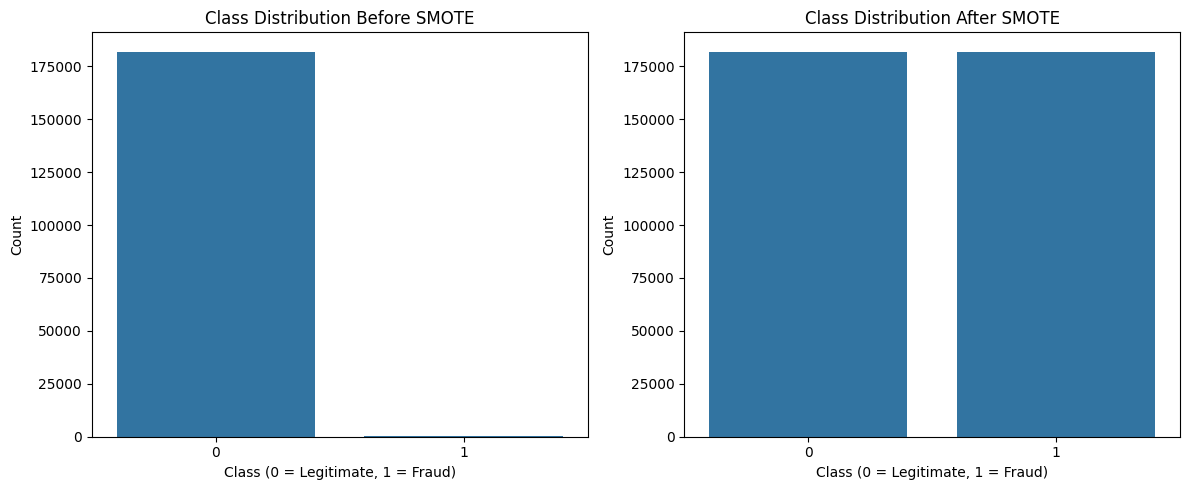

In [ ]:
from collections import Counter

# Checking class distribution before SMOTE
before_smote_counts = Counter(y_train)
before_fraud_percentage = (before_smote_counts[1] / sum(before_smote_counts.values())) * 100

# Applying SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)  # Apply SMOTE only on training data

# Checking class distribution after SMOTE
after_smote_counts = Counter(y_train_sm)
after_fraud_percentage = (after_smote_counts[1] / sum(after_smote_counts.values())) * 100

# Printing class distributions
print(f"Before SMOTE: Fraud cases = {before_smote_counts[1]} ({before_fraud_percentage:.4f}%)")
print(f"After SMOTE: Fraud cases = {after_smote_counts[1]} ({after_fraud_percentage:.4f}%)")
# Plotting class distribution before and after SMOTE
plt.figure(figsize=(12, 5))

# Before Applying SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")

# After Applying SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_sm)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
log_reg = LogisticRegression(random_state=42) # Logistic Regression (baseline model)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42) # Random Forest (ensemble model)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # XGBoost (boosting model)

# Training models on SMOTE-applied training data
log_reg.fit(X_train_sm, y_train_sm)
rf.fit(X_train_sm, y_train_sm)
xgb.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:50:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Random Forest (choosing different tree depths and splits)
rf_param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [5, 10, 20, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples needed to split a node
}

# Define parameter grid for XGBoost (adjusting depth, learning rate, and estimators)
xgb_param_grid = {
    'n_estimators': [50, 100],  # Number of boosting rounds
    'max_depth': [3, 5, 10],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2]  # How much each tree contributes to final prediction
}

# Initialize the models without predefined parameters
rf_tuned = RandomForestClassifier(random_state=42)
xgb_tuned = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rf_search = RandomizedSearchCV(rf_tuned, rf_param_grid, n_iter=5, scoring='f1', cv=2, n_jobs=-1, random_state=42)
xgb_search = RandomizedSearchCV(xgb_tuned, xgb_param_grid, n_iter=5, scoring='f1', cv=2, n_jobs=-1, random_state=42)

# Train (fit) the model using the SMOTE-balanced training data
rf_search.fit(X_train_sm, y_train_sm)
xgb_search.fit(X_train_sm, y_train_sm)

# Get best models with optimal parameters
rf_best = rf_search.best_estimator_
xgb_best = xgb_search.best_estimator_

# Display best parameters found
print("Hyperparameter tuning completed!")
print("Best Random Forest Parameters:", rf_search.best_params_)
print("Best XGBoost Parameters:", xgb_search.best_params_)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:06:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Hyperparameter tuning completed!
Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}
Best XGBoost Parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01}


In [ ]:
y_pred_log = log_reg.predict(X_test)

# Random Forest - Default & Tuned Versions
#y_pred_rf_default = rf.predict(X_test)   # Default model
y_pred_rf_tuned = rf_best.predict(X_test)  # Tuned model

# XGBoost - Default & Tuned Versions
#y_pred_xgb_default = xgb.predict(X_test)   # Default model
y_pred_xgb_tuned = xgb_best.predict(X_test)  # Tuned model

print("Predictions generated for all models!")

Predictions generated for all models!
